##*Elizabeth Torres Torrecillas* 

# *Actividad 7*



---

---





In [1]:
#Importar bibliotecas a utilizar 
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
#No existe un símbolo para denotar las potencias de matrices, por eso definimos la función 'mpow'
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt
#Utilizaremos la biblioteca *scipy.linalg* para operar con vectores y matrices
import scipy.linalg as la
#Matplotlib mostrará los resultados en la Notebook de Jupyter 
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* Álgebra Lineal con Python

**Ejercicio 1** 

Defina las siguientes matrices.

\begin{equation*}
 A
 =
  \begin{bmatrix}
   1 & 3 \\
   -1 & 7
   \end{bmatrix}
\end{equation*}


\begin{equation*}
 B =
  \begin{bmatrix}
   5 & 2 \\
   1 & 2
   \end{bmatrix}
\end{equation*}

 y la matrix identidad 

 \begin{equation*}
 I = 
   \begin{bmatrix}
   1 & 0 \\
   0 & 1
   \end{bmatrix}
\end{equation*}

Calcule el resultado de $2*I+3*A+A@B$.


In [2]:
#Definimos una matriz A
A = np.array([[1,3],[-1,7]])
#Definimos una matriz B
B = np.array([[5,2],[1,2]])
#Para definir la matriz identidad, se puede utilizar la función np.eye(2, dtype=int)
I = np.eye(2, dtype=int)

In [3]:
#Calculamos el resultado de la operación matricial:
R = 2*I+3*A+A@B
print(R)

[[13 17]
 [-1 35]]


**Ejercicio 2**

Los polinomios característicos y el Teorema de Cayley-Hamilton.

El polinomio característico de una matriz M esta dado en general por la ecuación 
\begin{equation}
\det(M - \lambda I) = 0
\end{equation}
Para una matriz cuadrada M (2x2), el polinomio característico se puede escribir como
\begin{equation}
P_2 (\lambda) = \det{(M)} - \mathrm{tr}(M) \, \lambda + \lambda^2   
\end{equation}
y para una matriz cuadrada M (3x3), el polinomio característico resulta ser

\begin{equation}
P_3 (\lambda) = \frac{1}{6} 
[ \mathrm{tr}^3 (M) + 2 \, \mathrm{tr }(M^3) - 3 \, \mathrm{tr}(M) \mathrm{tr}(M^2) ] - 
\frac{1}{2} [ \mathrm{tr}^2 (M) - \mathrm{tr}(M^2) ] \lambda + \mathrm{tr}(M) \lambda^2 - \lambda^3
\end{equation}

[El Teorema de Cayley-Hamilton](https://en.wikipedia.org/wiki/Cayley–Hamilton_theorem) nos dice que una matriz cuadrada M (2x2), satisface el polinomio característico
\begin{equation}
P_2(M) = \det(M) - \mathrm{tr}(M) M + M^2 
\end{equation}
y en general cualquier matriz cuadrada M (nxn), satisface $P_n(M)$. 

Demuestre esto para cualquier matriz M (2x2),  ($\det(M) \neq 0$).

* Siendo la matriz M(2x2)
\begin{equation*}
 M =
  \begin{bmatrix}
   a & b \\
   c & d
   \end{bmatrix}
\end{equation*}

In [4]:
#Definimos la matriz M (2x2)
#Donde se le pregunta al usuario las componentes de la matriz de interés
a = float( input( "Introduzca el valor de a: " ) )
b = float( input( "Introduzca el valor de b: " ) )
c = float( input( "Introduzca el valor de c: " ) )
d = float( input( "Introduzca el valor de d: " ) )

M = np.array([[a,b],[c,d]])

#Definimos la matriz Identidad (2x2)
I = np.eye(2, dtype=int)

#Calculamos el determinante de la matriz M 
det_M = la.det(M)
print("Determinante de M:", det_M)

#Calculamos la traza de M 
tr_M = np.trace(M)
print("Traza de M:", tr_M)
2
#Por el Teorema de Cayley-Hamilton
#El polinomio característico M(2x2), es de la forma:
PC = (det_M*I) - (tr_M*M) + (mpow(M,2))
print("Polinomio Característico:", PC)

Introduzca el valor de a: 88
Introduzca el valor de b: 2
Introduzca el valor de c: 9
Introduzca el valor de d: 1
Determinante de M: 70.0
Traza de M: 89.0
Polinomio Característico: [[0. 0.]
 [0. 0.]]


**Ejercicio 3**

Resuelva el sistema de ecuaciones.

\begin{eqnarray*}
x - 3 y + z & = & 1 \\ \nonumber
3 x - 4y + z & = & 5 \\ \nonumber
2 y - z & = & 0 \\ \nonumber
\end{eqnarray*}

La resolución del sistema de ecuaciones lineales será mediante  el método de Gauss Jordan. \\
Siendo el sistema de forma matricial:

$$ \begin{bmatrix}
1 & -3 & 1 \\
3 & -4 & 1\\
0 & 2 & -1
\end{bmatrix}\begin{bmatrix}
x \\
y \\
z
\end{bmatrix}=\begin{bmatrix}
1\\
5\\
0
\end{bmatrix} $$

Donde la matriz aumentada del sistema es:

$$\begin{bmatrix}
1 & -3 & 1 & | & 1\\
3 & -4 & 1 & | & 5\\
0 & 2 & -1 & | & 0
\end{bmatrix}$$


In [5]:
#Resolviendo un sistema de ecuaciones lineales
#Método de Eliminación Gaussiana

#Definimos nuestras funciones que nos ayudarán a realizar dicha eliminación
#Primera función
#Esta tiene la función de intercambiar la posición de los renglones.
def switch_rows(A,i,j):
    "Intercambiar renglones i y j en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

#Segunda función
#Esta tiene la función multiplicar un renglón por una constante no nula. 
def scale_row(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

#Tercera función
#Esta tiene la función de sumar un múltiplo de un reglon a otro renglón.
def add_row(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A

Sistema de ecuaciones a resolver:

\begin{eqnarray*}
x - 3 y + z & = & 1 \\ \nonumber
3 x - 4y + z & = & 5 \\ \nonumber
2 y - z & = & 0 \\ \nonumber
\end{eqnarray*}

In [6]:
#Definimos una matriz M (3x3)
#Dicha matriz representa los coeficientes de los términos lineales x, y, z del sistema
A = np.array([[1,-3,1],[3,-4,1],[0,2,-1]])

#Definimos una matriz A (3x1)
#Es la matriz de los términos independientes del sistema
B = np.array([1,5,0]).reshape(3,1)

#Determinamos la matriz aumentada del sistema
#Hacemos un tratado para poner acomodarlo de tal forma que podamos escribir la matriz aumentada del sistema
M = A
M = np.hstack([M,B])
print(M,)

[[ 1 -3  1  1]
 [ 3 -4  1  5]
 [ 0  2 -1  0]]


In [7]:
#Comenzamos a aplicar el método de eliminación gaussiana
#Multiplicamos al primer renglón por -3
#Le sumamos al nuevo primer renglón al segundo 
M = add_row(M,-3,1,0)
#Vemos cómo va la matriz
print(M)

[[ 1. -3.  1.  1.]
 [ 0.  5. -2.  2.]
 [ 0.  2. -1.  0.]]


In [8]:
#Multiplicamos el segundo renglón por 1/5
M = scale_row(M,1/5,1)
#Vemos cómo va la matriz
print(M)

[[ 1.  -3.   1.   1. ]
 [ 0.   1.  -0.4  0.4]
 [ 0.   2.  -1.   0. ]]


In [9]:
#Multiplicamos por -2 al segundo renglón
#Le sumamos el nuevo segundo renglón al tercer renglón
M = add_row(M,-2,2,1)
#Vemos cómo va la matriz
print(M)

[[ 1.  -3.   1.   1. ]
 [ 0.   1.  -0.4  0.4]
 [ 0.   0.  -0.2 -0.8]]


In [10]:
#Multiplicamos el segundo renglón por 3
#Le sumamos el nuevo segundo renglón el primer renglón 
M = add_row(M,3,0,1)#Vemos cómo va la matriz
print(M)

[[ 1.   0.  -0.2  2.2]
 [ 0.   1.  -0.4  0.4]
 [ 0.   0.  -0.2 -0.8]]


In [11]:
#Multiplicamos el tercer renglón por -1/0.2
M = scale_row(M,-1/0.2,2)
#Vemos cómo va la matriz
print(M)

[[ 1.   0.  -0.2  2.2]
 [ 0.   1.  -0.4  0.4]
 [ 0.   0.   1.   4. ]]


In [12]:
#Multiplicamos el tercer renglón por 0.2
#Le sumamos el nuevo tercer renglón al primer renglón 
M = add_row(M,0.2,0,2)#Vemos cómo va la matriz
print(M)

[[ 1.00000000e+00  0.00000000e+00 -9.99200722e-17  3.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -4.00000000e-01  4.00000000e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  4.00000000e+00]]


In [13]:
#Multiplicamos el tercer renglón por 0.4
#Le sumamos el nuevo tercer renglón al segundo renglón
M = add_row(M,0.4,1,2)
#Vemos cómo va la matriz
print(M)

[[ 1.00000000e+00  0.00000000e+00 -9.99200722e-17  3.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -8.88178420e-17  2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  4.00000000e+00]]


In [14]:
#El primer y segundo valor de la tercer columna tienden a cero
print("Consideramos que los números:", M[0,2], "y", M[1,2], "son prácticamente nulos")
S = M[:,3].reshape(3,1) 
print("Por lo que podemos decir que la solución del sistema es: \n",S)

Consideramos que los números: -9.992007221626409e-17 y -8.881784197001253e-17 son prácticamente nulos
Por lo que podemos decir que la solución del sistema es: 
 [[3.]
 [2.]
 [4.]]


In [15]:
#La otra forma de resolver el sistema de ecuaciones lineales es
#utilzando la función scipy.linalg.solve()
#Para ello debemos tener la matriz definida con los coeficientes de los términos lineales (A)
#y matriz de los términos intependientes, siendo B.
x_sol = la.solve(A,B)
print(x_sol)

[[3.]
 [2.]
 [4.]]


**Ejercicio 4** 

Dadas las siguientes matrices $B_1, B_2$ y $B_3$
 
\begin{equation*}
B_1 = \begin{bmatrix}
2 & 0 & 0 \\
0 & 3 & 4 \\
0 & 4 & 9 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
B_2 = \begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
B_3 = \begin{bmatrix}
2 & 0 & 0 & 0\\
1 & 2 & 0 & 0 \\
0 & 1 & 3 & 0 \\
0 & 0 & 1 & 3 \\
\end{bmatrix}
\end{equation*}

Encuentra los eigenvalores y eigenvectores de cada matriz utilizando la función de *scipy.linalg.eig()*, y contrasta tus resultados en cada caso con los que se desarrollan en los ejemplos de la Wikipedia. 

In [16]:
#Definimos a la matriz B1
B1 = np.array([[2,0,0],
               [0,3,4],
               [0,4,9]])
#Imrpimimos la Matriz B1
print("Matriz B1")
print(B1)

#Calculamos los eigenvalores y eigenvectores de la matriz B1
#Esto con ayuda de la biblioteca scipy.linalg.eig()
eigvalsB1, eigvecsB1 = la.eig(B1)
print('Eigenvalores:\n', eigvalsB1)

#Definimos los valores de los eigenvectores (v1,v2,v3)
v1 = eigvecsB1[:,0]
v2 = eigvecsB1[:,1]
v3 = eigvecsB1[:,2]
print("Eigenvectores:" )
print('v1=',v1)
print('v2=',v2)
print('v3=',v3)

Matriz B1
[[2 0 0]
 [0 3 4]
 [0 4 9]]
Eigenvalores:
 [11.+0.j  1.+0.j  2.+0.j]
Eigenvectores:
v1= [0.         0.4472136  0.89442719]
v2= [ 0.          0.89442719 -0.4472136 ]
v3= [1. 0. 0.]


In [17]:
#Definimos la matriz B2
B2 = np.array([[0,1,0],
               [0,0,1],
               [1,0,0]])
#Imrpimimos la Matriz B2
print("Matriz B2")
print(B1)

#Calculamos los eigenvalores y eigenvectores de la matriz B2
#Esto con ayuda de la biblioteca scipy.linalg.eig()
eigvalsB2, eigvecsB2 = la.eig(B2)
print('Eigenvalores:\n', eigvalsB2)

#Definimos los valores de los eigenvectores (v1,v2,v3)
v1 = eigvecsB2[:,0]
v2 = eigvecsB2[:,1]
v3 = eigvecsB2[:,2]
print("Eigenvectores:" )
print('v1=',v1)
print('v2=',v2)
print('v3=',v3)

Matriz B2
[[2 0 0]
 [0 3 4]
 [0 4 9]]
Eigenvalores:
 [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]
Eigenvectores:
v1= [ 0.57735027+0.j  -0.28867513+0.5j -0.28867513-0.5j]
v2= [ 0.57735027-0.j  -0.28867513-0.5j -0.28867513+0.5j]
v3= [-0.57735027+0.j -0.57735027+0.j -0.57735027+0.j]


In [18]:
#Definimos la matriz B3
B3 = np.array([[2,0,0,0],
               [1,2,0,0],
               [0,1,3,0],
               [0,0,1,3]])
#Imrpimimos la Matriz B3
print("Matriz B3")
print(B3)

#Calculamos los eigenvalores y eigenvectores de la matriz B3
#Esto con ayuda de la biblioteca scipy.linalg.eig()
eigvalsB3, eigvecsB3 = la.eig(B3)
print('Eigenvalores:\n', eigvalsB3)

#Definimos los valores de los eigenvectores (v1,v2,v3)
v1 = eigvecsB3[:,0]
v2 = eigvecsB3[:,1]
v3 = eigvecsB3[:,2]
v4 = eigvecsB3[:,3]
print("Eigenvectores:" )
print('v1=',v1)
print('v2=',v2)
print('v3=',v3)
print("v4=",v4)

Matriz B3
[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]
Eigenvalores:
 [3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigenvectores:
v1= [0. 0. 0. 1.]
v2= [ 0.00000000e+00  0.00000000e+00  6.66133815e-16 -1.00000000e+00]
v3= [ 0.          0.57735027 -0.57735027  0.57735027]
v4= [ 2.56395025e-16 -5.77350269e-01  5.77350269e-01 -5.77350269e-01]


`* Realizamos una comparación con los resultados que se desarrollan en wikipedia`

Los resultados de wikipedia y los obtenidos si coinciden para B1, B2 Y B2. Los resultados se deben de leer de arriba hacia abajo.

**Ejercicio 5.**
Se tienen los siguientes 8 puntos: 

\begin{eqnarray*} 
(x&,&y) \\
(0.0 &,& 0.0), \\ 
(0.5 &,& 0.47942), \\ 
(1.0 &,& 0.84147), \\
(1.5 &,& 0.99749), \\
(2.0 &,& 0.90930), \\
(2.5 &,& 0.59847), \\
(3.0 &,& 0.14112), \\
(3.5 &,& -0.35078) \\
\end{eqnarray*}

Encuentre un polinomio interpolante $p(x)$ que pase por los 8 puntos. 

Sobreponga la función $y=\sin(x)$ y contrástela con el polinomio $p(x)$.

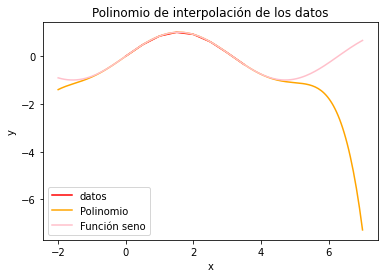

In [19]:
#Declaramos las componentes x y y de los 8 puntos de interés

x=np.array([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5]).reshape(8,1)

y=np.array([0.0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078]).reshape(8,1)

n=9
X = np.column_stack([x**k for k in range(0,n-1)])

#Encontramos los 8 coeficientes de la ec. lineal Xa = y
#Esto con ayuda de la función scipy.linalg.solve()
R = la.solve(X,y)
R.shape

#Graficamos el polinomio interpolante y los puntos interpolados
#Los puntos interpolados en rojo ('r.')
xs = np.linspace(-2,7,200)
ys = sum([R[k]*xs**k for k in range(0,8)])
ysin=np.sin(xs)

plt.plot(x,y,'red',label='datos')
plt.plot(xs,ys,'orange', label='Polinomio')
plt.plot(xs,ysin,'pink',label='Función seno')
plt.title('Polinomio de interpolación de los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Ejercicio 6.** 
Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.

**NOTA:** Pueden trabajar en sus Notebooks de la Actividad 5 o 6 y hacer el ajuste de regresión lineal allá donde tienen todo cargado en la memoria y luego copiar unas celdas de texto de esa Notebook y agregarlas al final de su Notebook de la Actividad 7. Así no tienen que cargar a la memoria todas las operaciones. 

In [20]:
#Importamos como csv la información de interés sobre la descomposición de la serie de tiempo
url1 = 'https://raw.githubusercontent.com/elizabethtorrest/Fisica-Computacional/F%C3%ADsica-Computacional/Actividad7/trendTmax.csv'
url2 = 'https://raw.githubusercontent.com/elizabethtorrest/Fisica-Computacional/F%C3%ADsica-Computacional/Actividad7/trendTmin.csv'

trTmax = pd.read_csv(url1, sep=',', encoding='cp1251', engine='python')
trTmin = pd.read_csv(url2, sep=',', encoding='cp1251', engine='python')

trTmax['Fecha']=pd.to_datetime(trTmax['Fecha']).copy()
trTmin['Fecha']=pd.to_datetime(trTmin['Fecha']).copy()

trTmax=trTmax.set_index('Fecha')
trTmin=trTmin.set_index('Fecha')

trTmax['fec_dec']=trTmax.index.year+(trTmax.index.dayofyear)/365
trTmin['fec_dec']=trTmin.index.year+(trTmin.index.dayofyear)/365

ar_trTmax=np.array([trTmax['Tmax']])
ar_trTmin=np.array([trTmin['Tmin']])
print(ar_trTmax.shape)
print(ar_trTmin.shape)


ar_trTmax=ar_trTmax.reshape(4656,1)
ar_trTmin=ar_trTmin.reshape(4656,1)

ar_trTmax_date=np.array([trTmax['fec_dec']]).reshape(4656,1)
ar_trTmin_date=np.array([trTmin['fec_dec']]).reshape(4656,1)

print(ar_trTmax,'\n')
print(ar_trTmax_date)


(1, 4656)
(1, 4656)
[[28.78110715]
 [28.78290111]
 [28.78479264]
 ...
 [28.9103235 ]
 [28.91588328]
 [28.92155643]] 

[[1993.50136986]
 [1993.50410959]
 [1993.50684932]
 ...
 [2007.24657534]
 [2007.24931507]
 [2007.25205479]]


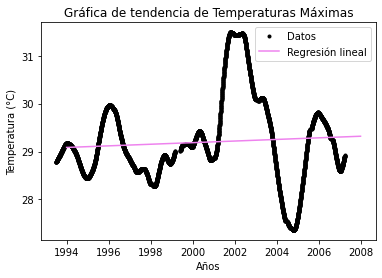

Pendiente de la recta de regresión lineal de los datos es:
 [0.0167264]


In [21]:
#Regresión lineal 

#Datos de tendencia 
##TEMPERATURA MÁXIMA

d_4656=np.array([1 for a in range(1,4657)]).reshape(4656,1)
X=np.hstack([d_4656,ar_trTmax_date])
a=la.solve(X.T @ X, X.T @ ar_trTmax)

xs=np.linspace(1994,2008,6000)
ys=a[0]+a[1]*xs

plt.plot(ar_trTmax_date, ar_trTmax, 'k.', label='Datos')
plt.plot(xs, ys, 'violet', label='Regresión lineal')
plt.title('Gráfica de tendencia de Temperaturas Máximas')
plt.xlabel('Años')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()
#Notamos que la pendiente es positiva, por lo que la tempertura máxima parece aumentar respecto al tiempo.
#Siendo un poco más observadores, a pesar de que esta es positiva, la pendiente es muy pequeña, por lo que realmente nos dice que la temperatura máxima no ha variado de manera significativa a través del tiempo analizado.
print('Pendiente de la recta de regresión lineal de los datos es:\n', a[1])

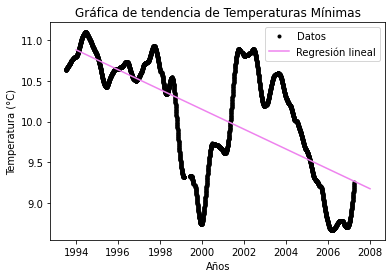

Pendiente de la recta de Regresión Lineal de los datos:
 [-0.12163487]


In [22]:
#Regresión lineal 

#Datos de tendencia 
##TEMPERATURA MÍNIMA

X1=np.hstack([d_4656,ar_trTmin_date])
a1=la.solve(X1.T @ X1, X1.T @ ar_trTmin)

xs=np.linspace(1994,2008,6000)
ys=a1[0]+a1[1]*xs

plt.plot(ar_trTmin_date, ar_trTmin, 'k.', label='Datos')
plt.plot(xs, ys, 'violet', label='Regresión lineal')
plt.title('Gráfica de tendencia de Temperaturas Mínimas')
plt.xlabel('Años')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()
#Notamos que la pendiente es negativa, por lo que la tempertura mínima parece decrecer respecto al tiempo analizado.
print('Pendiente de la recta de Regresión Lineal de los datos:\n',a1[1])